# **MODERN COMPUTER VISION** #
##### BY RAJEEV RATAN

<h2 style="margin-bottom:0;">🚀 Contours, Drawing, Hierarchy and Modes</h2>

<h5 style="margin-top:5px;">In this lesson we'll learn:</h5>

<p style="margin-top:0;">
1️⃣ Using findContours <br>
2️⃣ Drawing Contours <br>
3️⃣ Hierarchy of Contours <br>
4️⃣ Contouring Modes (Simple vs Approx) <br>
</p>

In [1]:
# Our Setup, Import Libraries and Create our Imshow Function
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

### **What are Contours?** ###

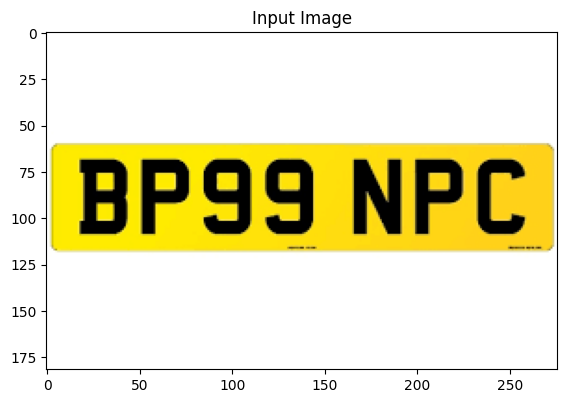

In [2]:
# Let's load a simple image license plate image
image = cv2.imread("../images/LP.png")
imshow('Input Image', image)

### **Applying cv2.findContours()** ###
### cv2.findContours(image, Retrieval Mode, Approximation Method) ###

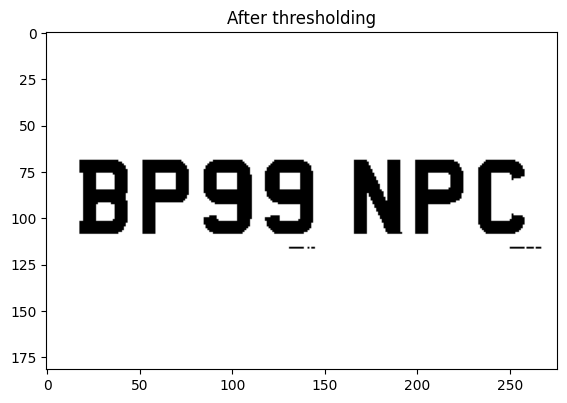

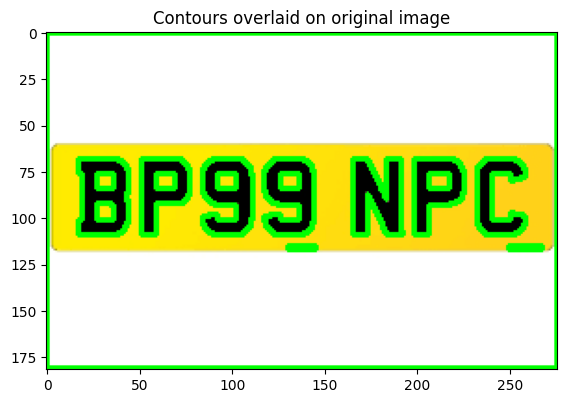

Number of Contours found = 20


In [3]:
image = cv2.imread("../images/LP.png")

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Find Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0, 255, 0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))

In [4]:
contours[0]

array([[[263, 116]],

       [[264, 115]],

       [[265, 115]],

       [[266, 115]],

       [[267, 116]],

       [[266, 117]],

       [[265, 117]],

       [[264, 117]]], dtype=int32)

### **What happens if we don't threshold? Bad things...** ###

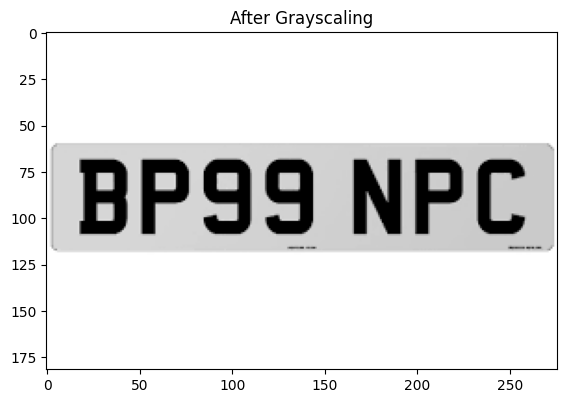

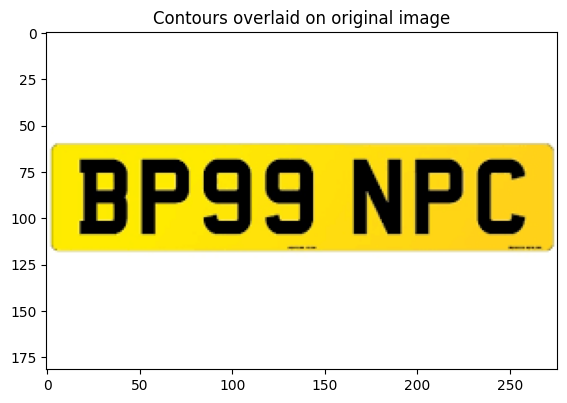

Number of Contours found = 14


In [5]:
image = cv2.imread("../images/LP.png")

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imshow('After Grayscaling', gray)

# Find Contours
contours, hierarchy = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
#cv2.drawContours(image, contours, -1, (0, 255, 0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))

## **NOTE: For findContours to work, the background has to be black and foreground (i.e., the text or objects)** ##
### Otherwise you'll need to invert the image by using **cv2..bitwise_not(input_image)** ###

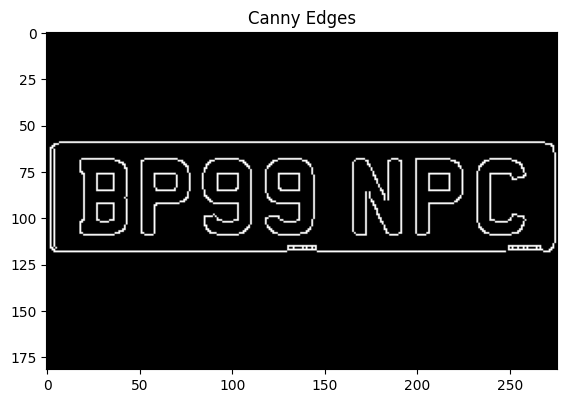

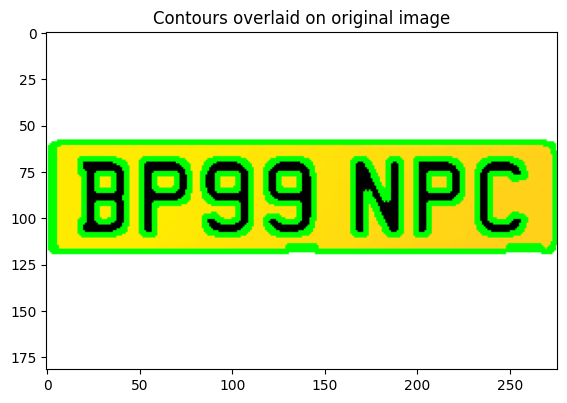

Number of Contours found = 40


In [8]:
image = cv2.imread("../images/LP.png")

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Canny Edges
edged = cv2.Canny(gray, 30, 200)
imshow('Canny Edges', edged)

# Find Contours
contours, hierarchy = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0, 255, 0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))

### **Remember these Contouring Steps** ###
#### 1. Grayscale ####
#### 2. Threshold or Canny Edge Detection to Binarize image ####

#### **Note:** Blurring before Step 2 is recommended to remove noisy contours ####

### **Retrieval Modes** ###

### **RETR_LIST** ###
##### Retrieves all the contours, but doesn't create any parent-child relationship. Parents and kids are equal under this rule, and they are just contours. i.e., they all belongs to same hierarchy level. #####

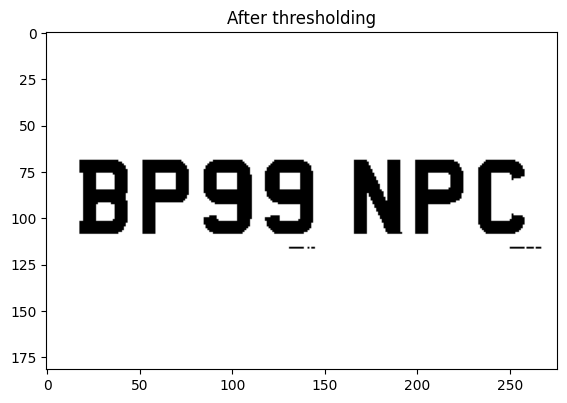

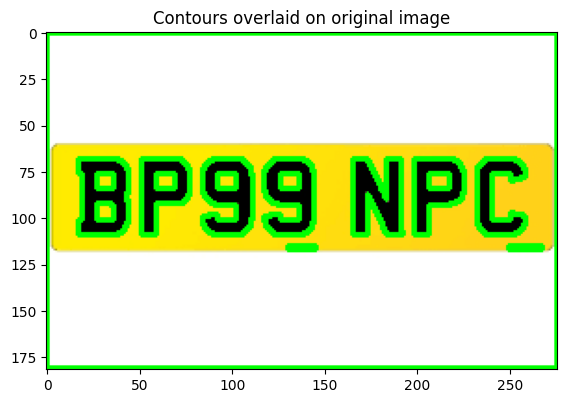

Number of Contours found = 20
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [11  9 -1 -1]
  [12 10 -1 -1]
  [13 11 -1 -1]
  [14 12 -1 -1]
  [15 13 -1 -1]
  [16 14 -1 -1]
  [17 15 -1 -1]
  [18 16 -1 -1]
  [19 17 -1 -1]
  [-1 18 -1 -1]]]


In [9]:
image = cv2.imread("../images/LP.png")

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0, 255, 0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))
print(hierarchy)

### **RETR_EXTERNAL** ###
##### Returns only extreme outer flags. All child contours are left behind. #####

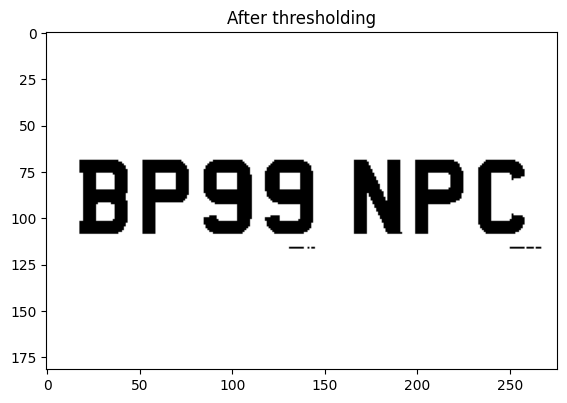

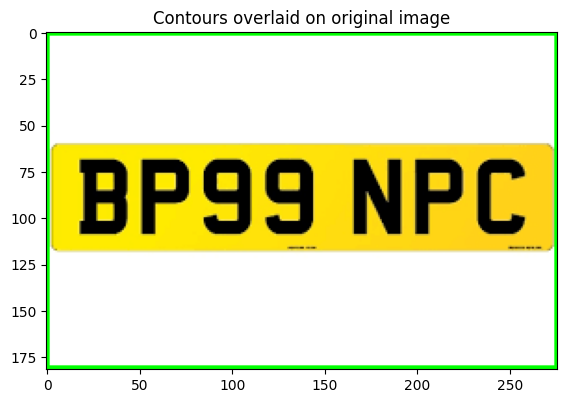

Number of Contours found = 1
[[[-1 -1 -1 -1]]]


In [11]:
image = cv2.imread("../images/LP.png")

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0, 255, 0), thickness = 2)
imshow('Contours overlaid on original image', image, size = 10)

print("Number of Contours found = " + str(len(contours)))
print(hierarchy)

### **RETR_CCOMP** ###
##### Retrieves all the contours and arranges them to a 2-level hierarchy. i.e., external contours of the object (i.e., its boundary) are placed in hierarchy-1. And the contours of holes inside object (if any) is placed in hierarchy-2. If any object inside it, its contour is placed again in hierarchy-1 only. And its hole in hierarchy-2 and so on. #####

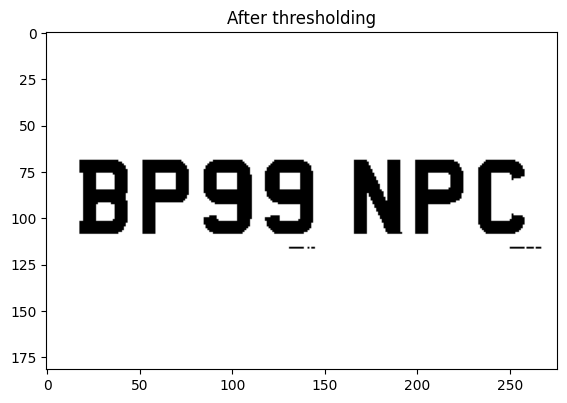

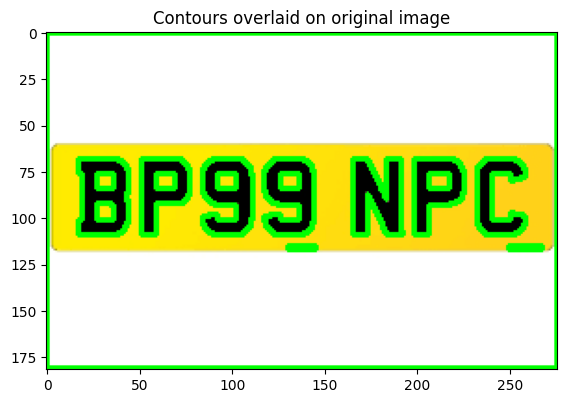

Number of Contours found = 20
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [-1  5  7 -1]
  [ 8 -1 -1  6]
  [ 9  7 -1  6]
  [10  8 -1  6]
  [11  9 -1  6]
  [12 10 -1  6]
  [13 11 -1  6]
  [14 12 -1  6]
  [15 13 -1  6]
  [16 14 -1  6]
  [17 15 -1  6]
  [18 16 -1  6]
  [19 17 -1  6]
  [-1 18 -1  6]]]


In [12]:
image = cv2.imread("../images/LP.png")

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0, 255, 0), thickness = 2)
imshow('Contours overlaid on original image', image, size = 10)

print("Number of Contours found = " + str(len(contours)))
print(hierarchy)

### **RETR_TREE** ###
##### It retrieves all the contours and creates a full family hierarchy list. #####

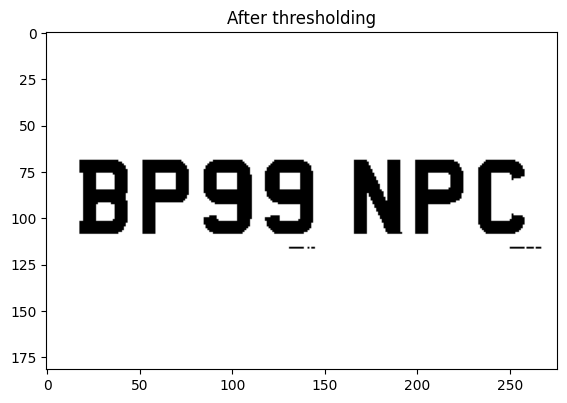

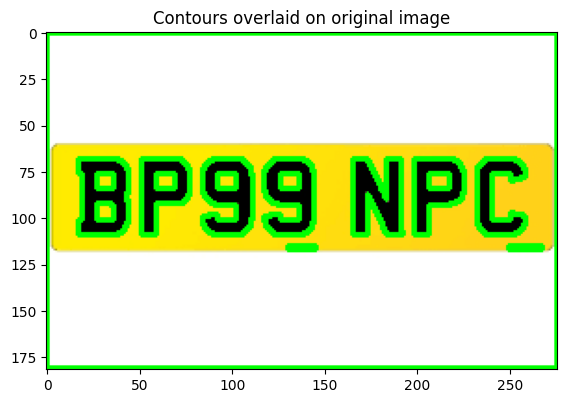

Number of Contours found = 20
[[[-1 -1  1 -1]
  [ 2 -1 -1  0]
  [ 3  1 -1  0]
  [ 4  2 -1  0]
  [ 5  3 -1  0]
  [ 6  4 -1  0]
  [ 7  5 -1  0]
  [ 8  6 -1  0]
  [10  7  9  0]
  [-1 -1 -1  8]
  [11  8 -1  0]
  [13 10 12  0]
  [-1 -1 -1 11]
  [15 11 14  0]
  [-1 -1 -1 13]
  [17 13 16  0]
  [-1 -1 -1 15]
  [-1 15 18  0]
  [19 -1 -1 17]
  [-1 18 -1 17]]]


In [13]:
image = cv2.imread("../images/LP.png")

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0, 255, 0), thickness = 2)
imshow('Contours overlaid on original image', image, size = 10)

print("Number of Contours found = " + str(len(contours)))
print(hierarchy)

### **Contouring Modes** ###

### **CHAIN_APPROX_NONE** ###

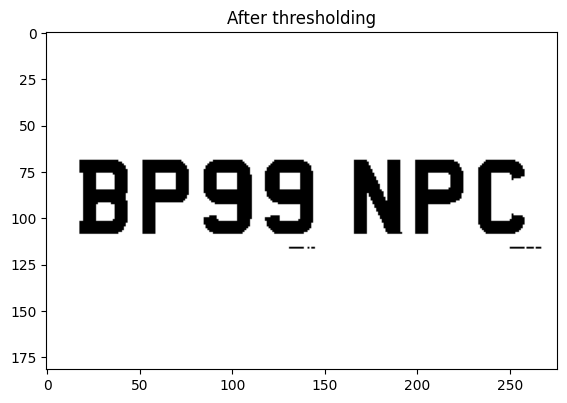

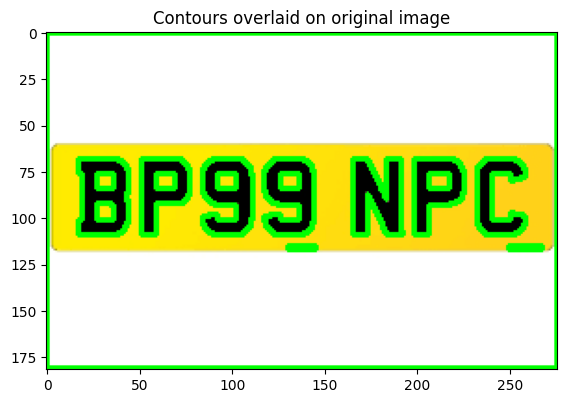

Number of Contours found = 20
912
8
10
18
6
4
18
156
123
36
195
148
36
146
36
122
36
126
33
33


In [15]:
image = cv2.imread("../images/LP.png")

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0, 255, 0), thickness = 2)
imshow('Contours overlaid on original image', image, size = 10)

print("Number of Contours found = " + str(len(contours)))
for c in contours:
    print(len(c))

### **CHAIN_APPROX_SIMPLE** ###

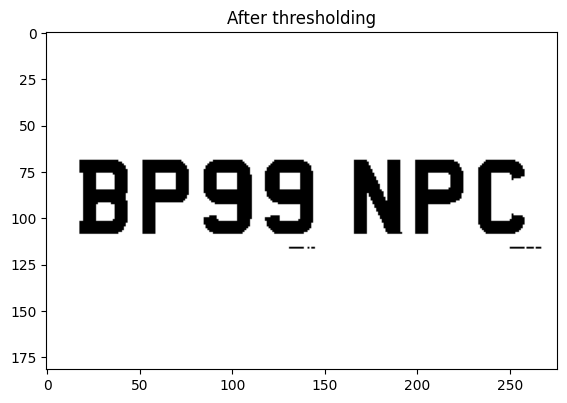

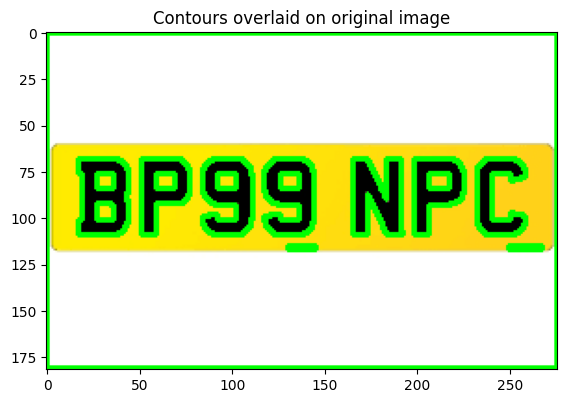

Number of Contours found = 20
4
6
6
6
6
4
6
36
23
6
53
36
4
36
4
15
4
28
8
5


In [17]:
image = cv2.imread("../images/LP.png")

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0, 255, 0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))
for c in contours:
    print(len(c))